In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [8]:
PATH = "champions.csv"
NUMERIC_COLUMNS = ["Picks", "Bans", "Presence", "Wins", "Losses", "Winrate", "KDA", "CSM", "DPM", "GPM", "CSD@15", "GD@15", "XPD@15"]


dataset = pd.read_csv(PATH)

In [10]:
dataset = dataset.loc[
    dataset['Picks'] > 0
]
dataset = dataset[
    [
        "Champion",
        "Picks", 
        "Bans", 
        "Presence", 
        "Wins", 
        "Losses", 
        "Winrate", 
        "KDA", 
        "CSM", 
        "DPM", 
        "GPM", 
        "CSD@15", 
        "GD@15", 
        "XPD@15"
    ]
]
dataset

for column in dataset.columns:
    if column in NUMERIC_COLUMNS:
        if dataset[column].dtype == 'object':
            dataset[column] = dataset[column].str.replace('%', '').astype(float) / 100
        dataset[column] = pd.to_numeric(dataset[column])

dataset.index = [index for index in range(len(dataset))]
dataset

,Champion,Picks,Bans,Presence,Wins,Losses,Winrate,KDA,CSM,DPM,GPM,CSD@15,GD@15,XPD@15
0,Aurora,9,30,1.00,7.0,2.0,0.78,6.6,7.9,678.0,402.0,0.6,76.0,-10.0
1,Yone,18,19,0.95,13.0,5.0,0.72,4.4,9.6,711.0,451.0,6.7,434.0,372.0
2,Rell,26,5,0.79,15.0,11.0,0.58,3.0,1.0,144.0,247.0,-0.5,11.0,-58.0
3,Jax,15,15,0.77,6.0,9.0,0.40,2.6,7.8,403.0,396.0,-8.9,-128.0,-201.0
4,Skarner,13,17,0.77,7.0,6.0,0.54,3.9,5.8,372.0,332.0,2.4,77.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Urgot,1,0,0.03,0.0,1.0,0.00,2.3,10.2,640.0,474.0,20.0,445.0,613.0
60,Xin Zhao,1,0,0.03,1.0,0.0,1.00,11.0,7.2,341.0,383.0,2.0,647.0,14.0
61,Camille,1,0,0.03,1.0,0.0,1.00,6.5,8.8,554.0,466.0,15.0,821.0,448.0
62,Lillia,1,0,0.03,0.0,1.0,0.00,4.0,6.7,386.0,347.0,-7.0,-865.0,-495.0


Text(0, 0.5, 'Внутри-кластерная сумма расстояний')

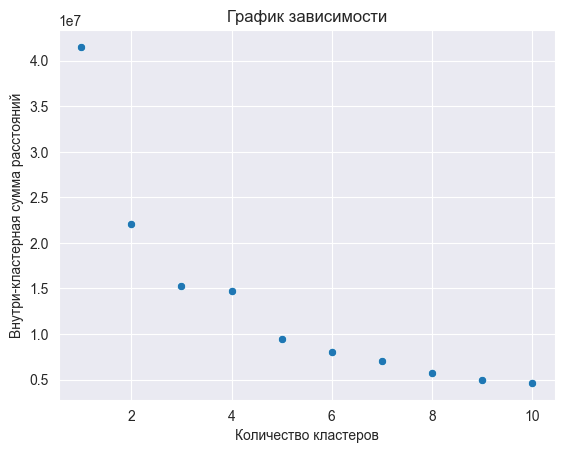

In [11]:
inertia = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, init= 'k-means++')
    k_means.fit(
    dataset.drop(
    "Champion",
    axis=1,
    )
    )
    inertia.append(k_means.inertia_)
    
sns.set_style('darkgrid')
sns.scatterplot(
    x=[x for x in range(1, 11)],
    y=inertia,
)

plt.title('График зависимости')
plt.xlabel('Количество кластеров')
plt.ylabel('Внутри-кластерная сумма расстояний')

In [13]:
CLUSTERS = 6
model = KMeans(
    n_clusters=CLUSTERS
)

model.fit(
    dataset.drop(
    "Champion",
    axis=1,
    )
)

clusters = pd.DataFrame(
columns=dataset.columns.drop("Champion"),
data=model.cluster_centers_
)

clusters["Amount"] = np.unique(
model.labels_,
return_counts=True
)[1]

clusters

,Picks,Bans,Presence,Wins,Losses,Winrate,KDA,CSM,DPM,GPM,CSD@15,GD@15,XPD@15,Amount
0,6.333333,5.133333,0.295333,2.933333,3.400000,0.364667,4.386667,8.333333,595.133333,400.733333,-3.466667,-405.133333,-387.533333,15
1,1.000000,2.000000,0.080000,1.000000,0.000000,1.000000,7.500000,7.950000,954.000000,454.000000,28.500000,1760.000000,1297.000000,2
2,6.111111,7.944444,0.361111,3.166667,2.944444,0.465556,5.350000,8.683333,656.833333,419.666667,6.611111,231.611111,376.277778,18
3,1.500000,0.500000,0.052500,0.750000,0.750000,0.582500,7.550000,7.100000,457.500000,388.750000,-21.925000,-908.750000,-1109.000000,4
4,2.666667,3.333333,0.155556,1.666667,1.000000,0.718889,5.966667,7.200000,471.111111,395.222222,7.222222,734.555556,357.222222,9
5,9.562500,7.062500,0.427500,4.625000,4.937500,0.444375,3.768750,3.912500,269.062500,299.500000,-0.518750,55.375000,-32.687500,16
